In [1]:
#Librerías generales
import pandas as pd
from pathlib import Path

#Librerías gráficas
import plotnine as pn

#Configuración
pd.set_option('display.max_columns', 100)

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargar ficheros
athletes_file = 'athlete_events.csv'

#Creamos el DataFrame
athletes_data = pd.read_csv(athletes_file)

#### Ejercicio 1.a

In [3]:
#Seleccionamos sólo los datos de los atletas chinos
athletes_data_china = athletes_data[(athletes_data["Team"] == "China")]

#Eliminamos los nulos en la columna Medal para quedarnos sólo con los atletas que ganaron alguna medalla
athletes_data_china_medals = athletes_data_china[athletes_data_china['Medal'].notna()]

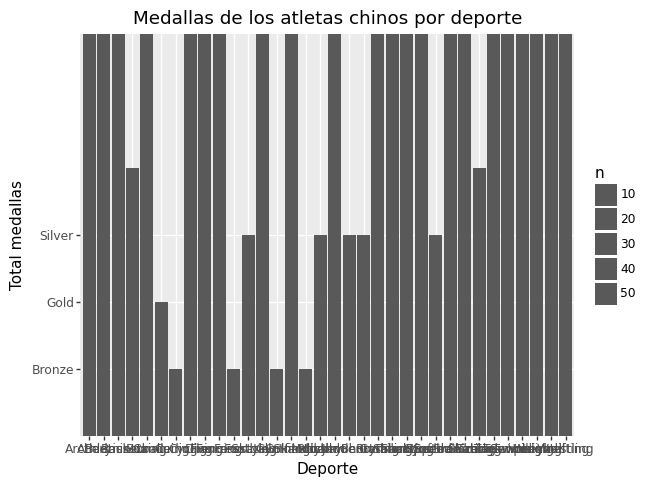

In [4]:
# Creamos el gráfico
graph = (
        pn.ggplot(athletes_data_china_medals, pn.aes(x="Sport", y="Medal"))
        + pn.geom_bar(stat="sum")
        + pn.ggtitle("Medallas de los atletas chinos por deporte")
        + pn.xlab("Deporte")
        + pn.ylab("Total medallas")
) 



# Mostramos el gráfico
graph.draw()

#### Ejercicio 1.b

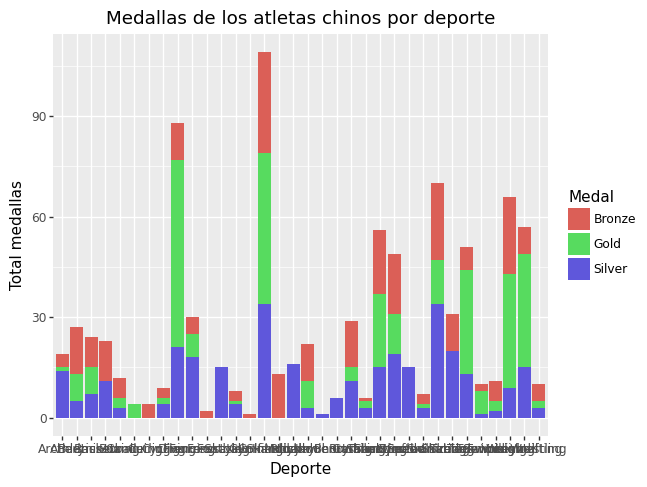

In [5]:
# Creamos el gráfico
graph = (
        pn.ggplot(athletes_data_china_medals, pn.aes(x="Sport", fill="Medal"))
        + pn.geom_bar()
        + pn.ggtitle("Medallas de los atletas chinos por deporte")
        + pn.xlab("Deporte")
        + pn.ylab("Total medallas")
)

# Mostramos el gráfico
graph.draw()

#### Ejercicio 1.c

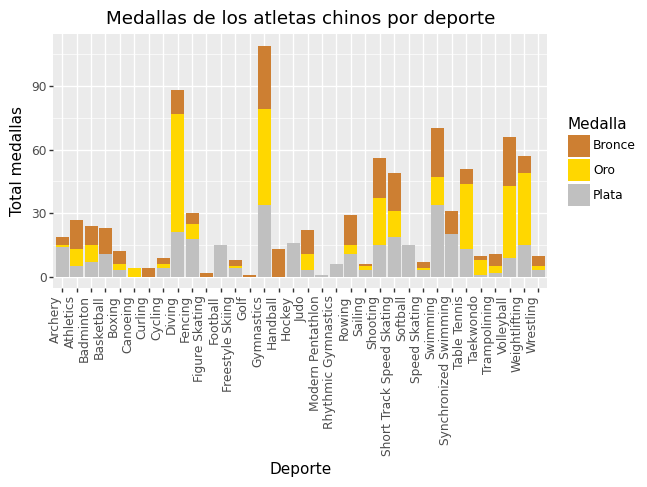

In [6]:
# Cambiamos los nombres de las medallas en el DataFrame
athletes_data_china_medals["Medal"] = athletes_data_china_medals["Medal"].replace({
    "Gold": "Oro",
    "Silver": "Plata",
    "Bronze": "Bronce"
})

# Creamos el gráfico
graph = (
        pn.ggplot(athletes_data_china_medals, pn.aes(x="Sport", fill="Medal"))
        + pn.geom_bar()
        + pn.ggtitle("Medallas de los atletas chinos por deporte")
        + pn.xlab("Deporte")
        + pn.ylab("Total medallas")        
        + pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1))
        + pn.scale_fill_manual(values={"Oro": "#FFD700", "Plata": "#C0C0C0", "Bronce": "#CD7F32"})
        + pn.labs(fill="Medalla")
        #+ pn.scale_fill_discrete(labels={"Gold": "Oro", "Silver": "Plata", "Bronze": "Bronce"})
)

# Mostramos el gráfico
graph.draw()

#### Ejercicio 2.a

In [7]:
#Seleccionamos sólo los datos de los atletas rusos
athletes_data_russia = athletes_data[(athletes_data["Team"] == "Russia")]

#Eliminamos los nulos en la columna Medal para quedarnos sólo con los atletas que ganaron alguna medalla
athletes_data_russia_medals = athletes_data_russia[athletes_data_russia['Medal'].notna()]

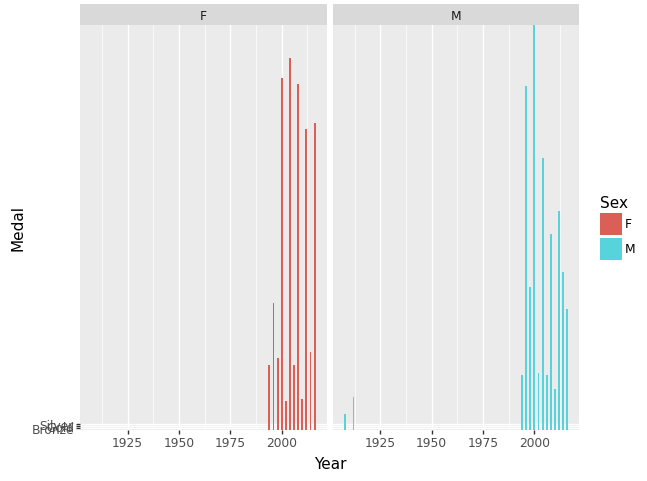

In [8]:
# Creamos el gráfico
graph = (
        pn.ggplot(athletes_data_russia_medals, pn.aes(x="Year", y="Medal", fill="Sex"))
        + pn.facet_wrap("Sex")
        + pn.geom_bar(stat="identity")
)

# Mostramos el gráfico
graph.draw()

#### Ejercicio 2.b

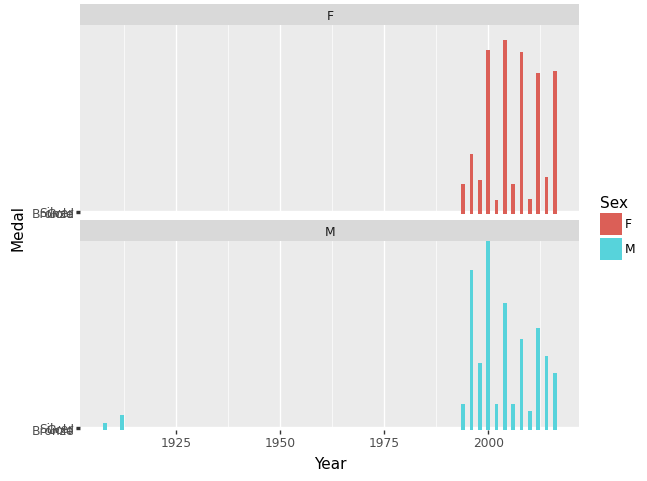

In [9]:
# Creamos el gráfico
graph = (
        pn.ggplot(athletes_data_russia_medals, pn.aes(x="Year", y="Medal", fill="Sex"))
        + pn.facet_wrap("Sex", nrow=2)
        + pn.geom_bar(stat="identity")
)

# Mostramos el gráfico
graph.draw()

#### Ejercicio 2.c

In [10]:
#Agrupamos por años con el número total de medallas por tipo
athletes_data_russia_medals = athletes_data_russia.groupby(['Year', 'Sex'])['Medal'].value_counts().reset_index()

#renombramos la columna count a total
athletes_data_russia_medals.rename(columns={'count': 'Total'}, inplace=True)

#Creamos un dataframe con el número total de medallas por año
athletes_data_russia_total_medals = athletes_data_russia_medals.groupby(['Year', 'Sex'])['Total'].sum().reset_index()

athletes_data_russia_total_medals.head(10)

,Year,Sex,Total
0,1908,M,3
1,1912,M,7
2,1994,F,16
3,1994,M,12
4,1996,F,31
5,1996,M,84
6,1998,F,16
7,1998,M,28
8,2000,F,89
9,2000,M,98


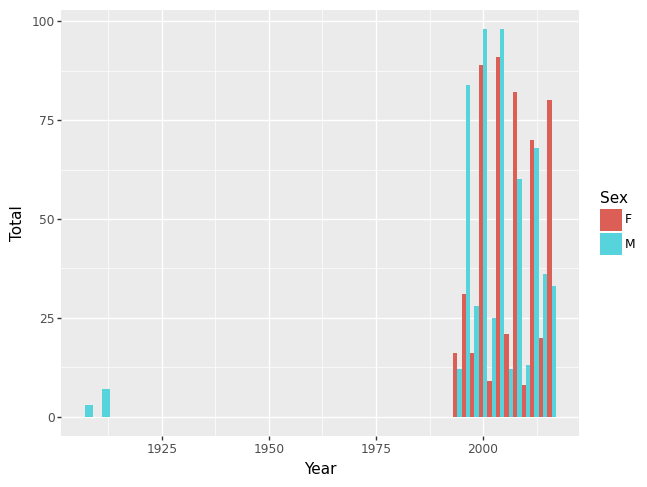

In [11]:
# Creamos el gráfico
graph = (
        pn.ggplot(athletes_data_russia_total_medals, pn.aes(x="Year", y="Total", fill="Sex"))
        + pn.geom_bar(stat='identity', position="dodge", width=2.0)
)

# Mostramos el gráfico
graph.draw()

#### Ejercicio 2.d

In [12]:
athletes_data_russia_total_medals.drop(athletes_data_russia_total_medals[athletes_data_russia_total_medals['Year'] < 1994].index, inplace=True)

In [13]:
athletes_data_russia_total_medals.head()

,Year,Sex,Total
2,1994,F,16
3,1994,M,12
4,1996,F,31
5,1996,M,84
6,1998,F,16


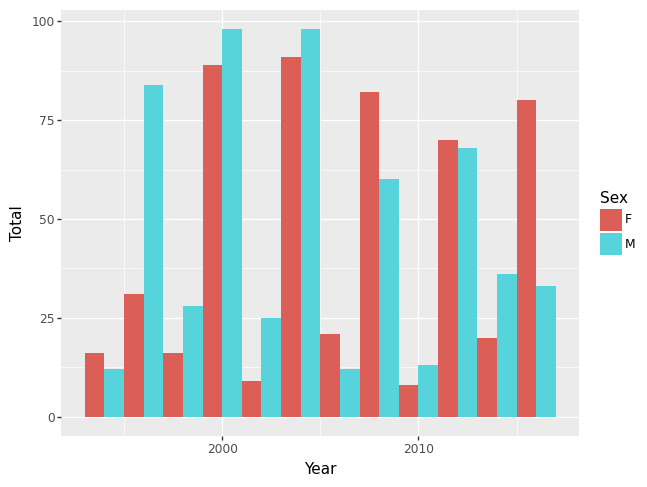

In [14]:
# Creamos el gráfico
graph = (
        pn.ggplot(athletes_data_russia_total_medals, pn.aes(x="Year", y="Total", fill="Sex"))
        + pn.geom_bar(stat='identity', position="dodge", width=2.0)
)

# Mostramos el gráfico
graph.draw()

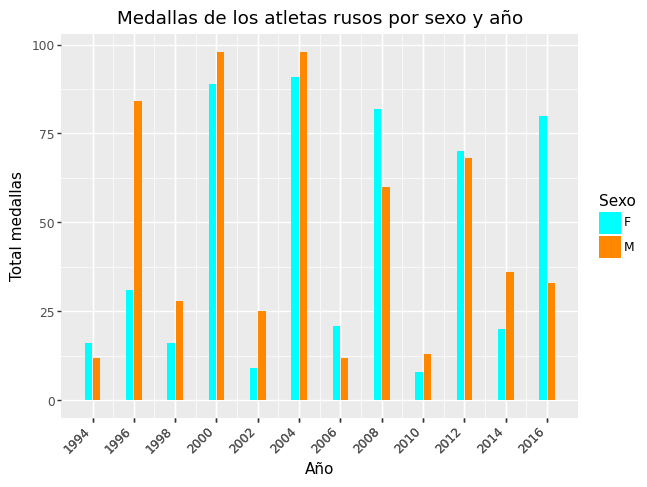

In [15]:
# Creamos el gráfico y ajustamos el ancho de las barras y la posición de los ejes
graph = (
        pn.ggplot(athletes_data_russia_total_medals, pn.aes(x="Year", y="Total", fill="Sex"))
        + pn.geom_bar(stat='identity', position=pn.position_dodge(width=0.8), width=0.7)
        + pn.theme(axis_text_x=pn.element_text(angle=45, hjust=1))  # Ajustamos el ángulo de las etiquetas en el eje x
        + pn.scale_x_continuous(breaks=athletes_data_russia_total_medals['Year'].tolist())  # Mostrar todos los años
        + pn.ggtitle("Medallas de los atletas rusos por sexo y año")
        + pn.xlab("Año")
        + pn.ylab("Total medallas")        
        + pn.scale_fill_manual(values={"F": "#00FFFF", "M": "#FF8800"})
        + pn.labs(fill="Sexo")
)

# Mostramos el gráfico
graph.draw()

#### Ejercicio 3.a

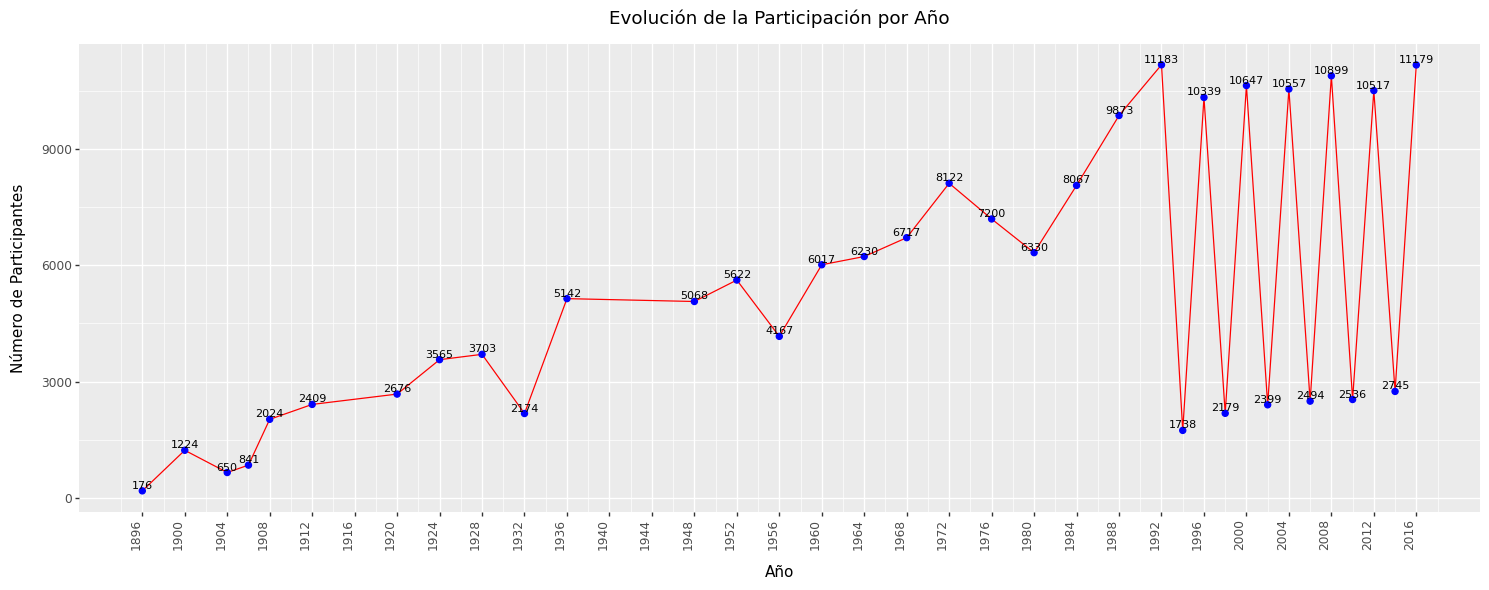

In [16]:

# Agrupar los datos por año y cuenta el número de participantes en cada año
athletes_data_year = athletes_data.groupby('Year')['ID'].nunique().reset_index()

# Crear un gráfico de líneas que muestre la evolución de la participación a lo largo de los años
(pn.ggplot(athletes_data_year, pn.aes(x='Year', y='ID')) +
    pn.geom_line(color="red") +
    pn.labs(title='Evolución de la Participación por Año', x='Año', y='Número de Participantes') +
    pn.scale_x_continuous(breaks=range(athletes_data_year['Year'].min(), athletes_data_year['Year'].max() + 1, 4)) +
    pn.theme(axis_text_x=pn.element_text(angle=90, hjust=1, vjust=1), figure_size=(15, 6)) +  # Ajustes de tamaño y espacio
    pn.geom_point(data=athletes_data_year, color="blue", size=2) +  # Añadir puntos
    pn.geom_text(data=athletes_data_year, mapping=pn.aes(label='ID'), color='black', size=8, va='bottom')  # Añadir texto
).draw()

#### Ejercicio 3.b

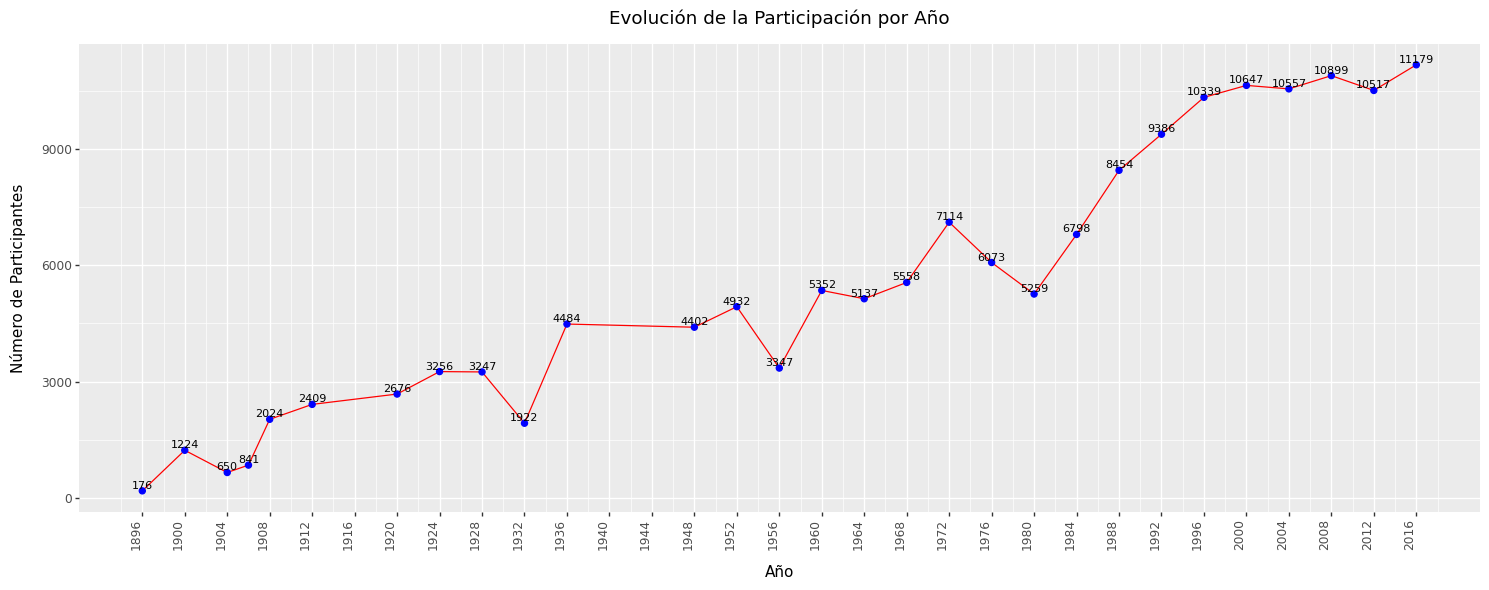

In [17]:
# Filtra los datos para obtener solo los Juegos Olímpicos de Verano
athletes_data_year_summer = athletes_data[athletes_data['Season'] == 'Summer'].groupby('Year')['ID'].nunique().reset_index()


# Crear un gráfico de líneas que muestre la evolución de la participación a lo largo de los años
(pn.ggplot(athletes_data_year_summer, pn.aes(x='Year', y='ID')) +
    pn.geom_line(color="red") +
    pn.labs(title='Evolución de la Participación por Año', x='Año', y='Número de Participantes') +
    pn.scale_x_continuous(breaks=range(athletes_data_year_summer['Year'].min(), athletes_data_year_summer['Year'].max() + 1, 4)) +
    pn.theme(axis_text_x=pn.element_text(angle=90, hjust=1, vjust=1), figure_size=(15, 6)) +  # Ajustes de tamaño y espacio
    pn.geom_point(data=athletes_data_year_summer, color="blue", size=2) +  # Añadir puntos
    pn.geom_text(data=athletes_data_year_summer, mapping=pn.aes(label='ID'), color='black', size=8, va='bottom')  # Añadir texto
).draw()

#### Ejercicio 4 ####

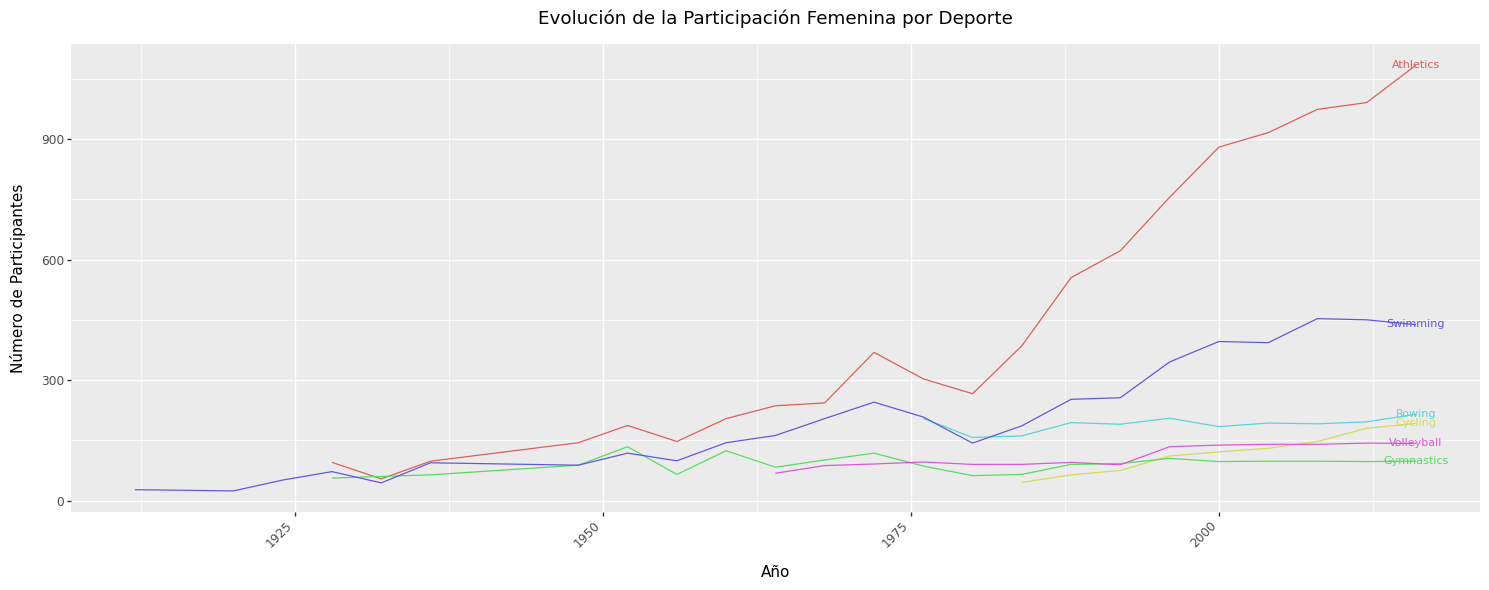

In [18]:
# Filtra los datos para obtener solo las participantes femeninas
athletes_data_female = athletes_data[athletes_data['Sex'] == 'F']

# Agrupa los datos por año y deporte y cuenta el número de participantes femeninas
athletes_female_year = athletes_data_female.groupby(['Year', 'Sport'])['ID'].nunique().reset_index()

# Filtra para incluir solo los deportes de interés 
sports = ['Athletics', 'Swimming', 'Cycling', 'Gymnastics', 'Rowing', 'Volleyball']
athletes_female_year = athletes_female_year[athletes_female_year['Sport'].isin(sports)]

# Crea un gráfico de líneas para visualizar esta información
graph = (
    pn.ggplot(athletes_female_year, pn.aes(x='Year', y='ID', color='Sport', label='Sport')) +
    pn.geom_line() +
    pn.geom_text(data=athletes_female_year.groupby('Sport').tail(1), size=8, position=pn.position_nudge(y=1), show_legend=False) +  # Añade etiquetas al gráfico y deshabilita la leyenda
    pn.labs(title='Evolución de la Participación Femenina por Deporte', x='Año', y='Número de Participantes') +
    pn.theme(axis_text_x=pn.element_text(angle=45, hjust=1), legend_position='none', figure_size=(15, 6))  # Rotar etiquetas del eje x y eliminar leyendas
)

# Muestra el gráfico
graph.draw()
